This code shows usage of gridsearch to select the best classification model. 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("cuisines.csv")
X = df.drop(['Unnamed: 0', 'cuisine'], axis=1)
y = df['cuisine']
print(X.shape, y.shape)
print(X[:3], y[:3])

(2448, 383) (2448,)
   almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  

[3 rows x 383 columns] 0    indian
1    indian
2    indian
Name: cuisine, dtype: object


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.pipeline import Pipeline


In [33]:
classifiers = [
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())]

# classifier = [
#     ('Logistic Regression', LogisticRegression(max_iter=1000))]

# Create a pipeline with classifier
pipeline = Pipeline([
    ('classifier', None)
])

# Define parameter grid for each classifier
param_grid = [
    {
        'classifier': [SVC()],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100, 200]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2,3,5,7]
    }
   
]

In [34]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')


In [35]:
grid_search.fit(X_train, y_train)

# Get the best classifier
best_classifier = grid_search.best_estimator_
print("Best classifier: ",best_classifier.named_steps['classifier'])

Best classifier:  SVC(C=1, gamma=0.1)


In [ ]:
from sklearn import set_config
set_config(display='diagram')
display(grid_search)

In [41]:
# Evaluate the best classifier
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8306122448979592


In [43]:
from sklearn.metrics import ConfusionMatrixDisplay


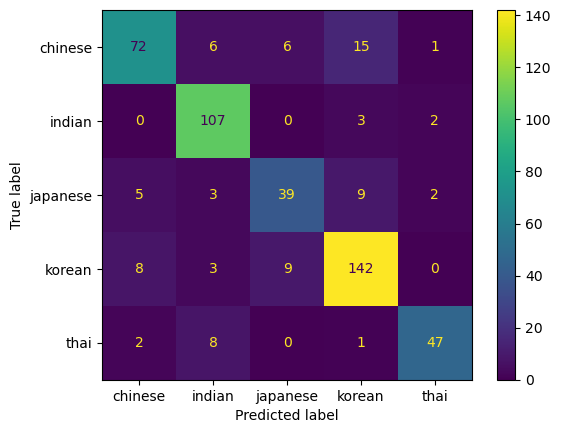

In [48]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['chinese','indian','japanese','korean','thai'])
cmp.plot()

In [45]:
df['cuisine'].unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [49]:
# Calculate confusion matrix and classification report for all models
for name, clf in classifiers:
    print("\nClassifier:", name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Perform 5-fold cross-validation across all classifiers
for name, clf in classifiers:
    print("\nClassifier:", name)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", np.mean(scores))


Classifier: SVM
Confusion Matrix:
 [[ 73   6   6  14   1]
 [  0 107   0   3   2]
 [  5   3  39   9   2]
 [  8   2   9 143   0]
 [  2   8   0   1  47]]
Classification Report:
               precision    recall  f1-score   support

     chinese       0.83      0.73      0.78       100
      indian       0.85      0.96      0.90       112
    japanese       0.72      0.67      0.70        58
      korean       0.84      0.88      0.86       162
        thai       0.90      0.81      0.85        58

    accuracy                           0.83       490
   macro avg       0.83      0.81      0.82       490
weighted avg       0.83      0.83      0.83       490


Classifier: Random Forest
Confusion Matrix:
 [[ 71   5   9  13   2]
 [  2 108   0   0   2]
 [  8   4  32  12   2]
 [ 10   2   8 142   0]
 [  3  13   0   1  41]]
Classification Report:
               precision    recall  f1-score   support

     chinese       0.76      0.71      0.73       100
      indian       0.82      0.96      0